# Module 2 Practice 2 - One-Way Repeated Measures ANOVA

In this practice exercise, you will perform a one-way Repeated Measures ANOVA on a dataset in long form.

The data is documented [here](../resources/theoph.txt).

Refer to the [documentation](https://pingouin-stats.org/generated/pingouin.rm_anova.html) for the pingouin rm_anova method for using data in a long format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install pingouin
import pingouin as pg

pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('../resources/theoph.csv')

data.head(10)

,subject,agent,clearance
0,1,1,5.88
1,1,2,5.13
2,1,3,3.69
3,2,1,5.89
4,2,2,7.04
5,2,3,3.61
6,3,1,1.46
7,3,2,1.46
8,3,3,1.15
9,4,1,4.05


/opt/conda/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## State the Null and Alternative Hpotheses

Your text here

The Null Hypothesis is that the means for theophylline clearance within subjects treated by theophylline given in conjunction with placebo, Pepcid, and Tagamet are equal.

The Alterntive Hypothesis is that at least one of the means differs.

## Check for missing data


In [3]:
# your code here

data[data.isna().any(axis=1)]

,subject,agent,clearance


## Check the distribution of data

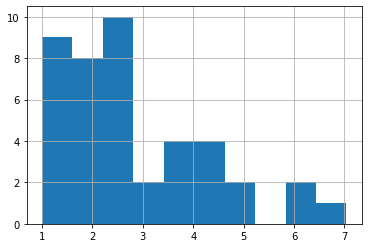

In [4]:
# your code here

data['clearance'].hist()

## Apply a transformation to normalize the data
Some appropriate transformations for right tailed distributions are:
1. log base 2 or log base 10 (cannot be used where data contains the value zero)
1. root transformation - square root, cube root, or higher order roots
1. inverse transformation

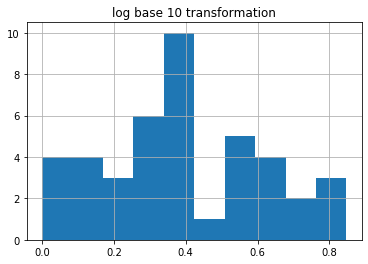

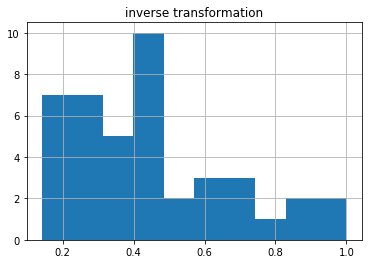

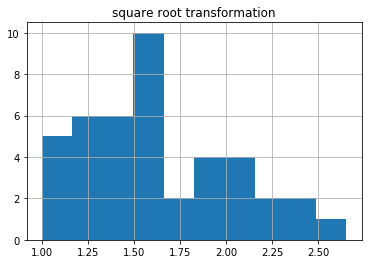

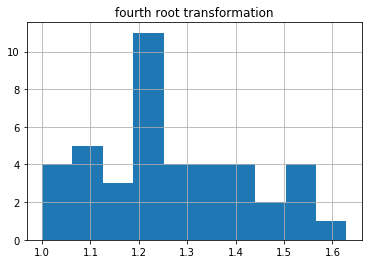

In [5]:
# your code here

data['clearance_trans'] = np.log10(data['clearance'])
data['clearance_trans'].hist()
plt.title('log base 10 transformation')
plt.show()

data['clearance_trans'] = 1/data['clearance']
data['clearance_trans'].hist()
plt.title('inverse transformation')
plt.show()

data['clearance_trans'] = np.sqrt(data['clearance'])
data['clearance_trans'].hist()
plt.title('square root transformation')
plt.show()

data['clearance_trans'] = data['clearance'].apply(lambda x: x**(1/4))
data['clearance_trans'].hist()
plt.title('fourth root transformation')
plt.show()

## Test the sphericity
Use the significance level of $\alpha$ = 0.05.
Check the [documentation](https://pingouin-stats.org/generated/pingouin.sphericity.html) for the correct invocation of the method for data in long format.  The transformed clearance data should be used as the dependent variable.

In [6]:
# your code here

pg.sphericity(data, dv='clearance_trans', subject='subject', within='agent', alpha=0.05)

SpherResults(spher=True, W=1080.6089152579673, chi2=-83.82335965993114, dof=2, pval=1.0)

## Does the data pass the sphericity test?  Do you expect a correction to be applied when running the Repeated Measures ANOVA?

Your text here

The data do pass the sphericity test, so we should not expect a correction to be applied when running ANOVARM.

## Perform a One-Way ANOVARM
Use the significance level of $\alpha$ = 0.05.

Check the [documentation](https://pingouin-stats.org/generated/pingouin.rm_anova.html) for the correct invocation of the method for data in long format. It should be very similar to the parameters used to test sphericity.

In [7]:
# your code here

pg.rm_anova(data=data, dv='clearance_trans', subject='subject', within='agent')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,agent,2,26,18.618003,0.00001,0.588842,0.681656


## Interpret the results
Do we reject the Null Hypothesis?

Your interpretation here

The p value of 0.00001 is signifcant at $\alpha$ = 0.05.  Therefore, we reject the Null that the means for theophylline clearance within subjects treated by theophylline given in conjunction with placebo, Pepcid, and Tagamet are equal, and support that at least one of the means differs.

## Display an appropriate chart to highlight where there might be differences

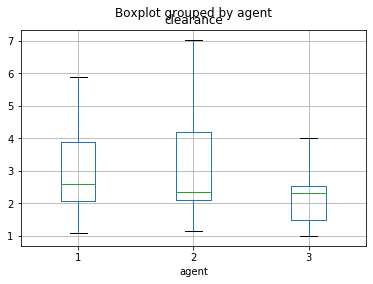

In [8]:
# your code here

data.boxplot(column='clearance', by='agent')